In [1]:
from pandas.plotting import scatter_matrix
import statsmodels.api
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Problem 1

#### Part (a)

In [2]:
import pandas as pd
df = pd.read_csv("data/Auto.csv", na_values = ["?"])

In [3]:
df.dropna(inplace = True)

#### Part (b)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026CBFFD1808>


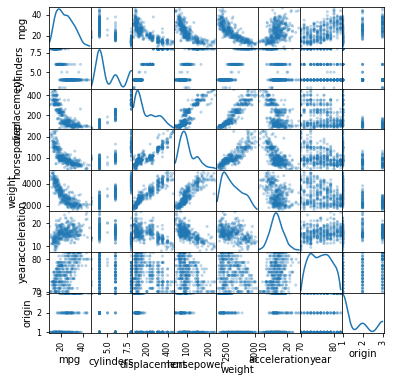

In [4]:
print(scatter_matrix(df, alpha=0.3, figsize=(6, 6), diagonal='kde'))

#### Part (c)

In [5]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


#### Part (d)

In [6]:
# df = statsmodels.tools.tools.add_constant(df, prepend=True)
# indep = df[['const', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
df.insert(1, "const", 1)
ols_result = statsmodels.api.OLS(df["mpg"], df.loc[:, "const" : "origin"]).fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 19 Feb 2020   Prob (F-statistic):          2.04e-139
Time:                        09:03:21   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i) $\beta_0$(constant); $\beta_2$(displacement); $\beta_4$(weight); $\beta_6$ (year); $\beta_7$ (origin)

ii) $\beta_1$ (cylinders); $\beta_3$ (horsepower); $\beta_5$ (acceleration)

iii) $\beta_6 = 0.7508$ is statistically significant at the 1% level. The statistic interpretation is that holding other variable constant, one unit increase in year would increase the mpg by 0.7508.

#### Part(e)

In [7]:
df['disp_sq'] = df['displacement'] ** 2
df['hrsp_sq'] = df['horsepower'] ** 2
df['weight_sq'] = df['weight'] ** 2
df['acce_sq'] = df['acceleration'] ** 2

indep = df[['const', 'cylinders', 'disp_sq', 'hrsp_sq', 'weight_sq', 'acce_sq', 'year', 'origin']]


In [8]:
ols_result2 = statsmodels.api.OLS(df["mpg"], indep).fit()
ols_result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     222.6
Date:                Wed, 19 Feb 2020   Prob (F-statistic):          6.37e-131
Time:                        09:03:34   Log-Likelihood:                -1043.5
No. Observations:                 392   AIC:                             2103.
Df Residuals:                     384   BIC:                             2135.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.4628      4.442     -5.732      0.000     -34.197     -16.729
cylinders     -1.2260      0.284     -4.321      0.000      -1.784      -0.668
disp_sq     6.412e-05   1.35e-05      4.736      0.000    3.75e-05    9.07e-05
hrsp_sq    -5.615e-05   4.97e-05     -1.130      0.259      -0.000    4.16e-05
weight_sq  -9.095e-07    8.9e-08    -10.215      0.000   -1.08e-06   -7.34e-07
acce_sq        0.0060      0.003      2.245      0.025       0.001       0.011
year           0.7606      0.053     14.304      0.000       0.656       0.865
origin         1.6707      0.276      6.062      0.000       1.129       2.213
==============================================================================
Omnibus:                       20.589   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.354
Skew:                           0.409   Prob(JB):                     4.23e-07
Kurtosis:                       4.062   Cond. No.                     2.77e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i) Adjusted R-squared in part e is 0.799; Adjusted R-squared in part d is 0.818. Thus, we have a smaller adjusted R-squared in this part 

ii) In the part b, the pvalue for displacement is 0.008, but in this part, the squared term has an extremely small p-value and close to 0. The displacement and squared displacement are significant in both models, but the squared term has a smaller p-value

iii) In part b, the p-value for culinders is 0.128, but the squraed term has p-value close to zero. The variable becomes significant in the new model.

#### Part (f)

In [9]:
predict2 = ols_result2.predict(exog=[1, 6, 200, 100, 3100, 15.1, 99, 1])
print(f"The prediction based on the squared model is {float(predict2)}")

The prediction based on the squared model is 44.245713623297505


### Problem 2

In [10]:
obs = pd.DataFrame([[0, 3, 0, "Red"],
                    [2, 0, 0, 'Red'], 
                    [0, 1, 3, 'Red'], 
                    [0, 1, 2, 'Green'], 
                    [-1, 0, 1, 'Green'], 
                    [1, 1, 1, 'Red']],
                  columns = ["x1", 'x2', 'x3', 'y'])

#### Part(a)

In [11]:
obs['dist'] = (obs['x1'] ** 2 + obs['x2'] ** 2 + obs['x3'] ** 2) ** 0.5
obs

,x1,x2,x3,y,dist
0,0,3,0,Red,3.000000
1,2,0,0,Red,2.000000
2,0,1,3,Red,3.162278
3,0,1,2,Green,2.236068
4,-1,0,1,Green,1.414214
5,1,1,1,Red,1.732051


#### Part(b)
When K = 1, the KNN prediction would be 'Green' because the observation 5 is the closest point.
#### Part (c)
When K = 3, the KNN prediction would be "Red", because there are two red points among the least three distance points. The probability that this point being recognized as "Red" is one third.

#### Part (d)

If the Bayes decision boundary in this problem is highly non-linear, then the best value for K can be small. If the K is large, we would have a smooth boundary which will exclude the potential points that seem to be outliers.

#### Part (e)

In [14]:
KNN = neighbors.KNeighborsClassifier(n_neighbors = 2)
x_val = obs.loc[:, 'x1' : "x3"]
KNN_result = KNN.fit(x_val, obs['y'])
print(f'Predicted value for (1,1,1) is:{KNN_result.predict([(0, 0, 0)])}')

Predicted value for (1,1,1) is:['Green']


### Problem 3

#### Part (a)

In [15]:
df[ "mpg_high" ] = (df['mpg'] >= df['mpg'].median()).astype(int)


logit_result = statsmodels.api.Logit(df["mpg_high"], df.loc[:, "const" : "origin"]).fit()
logit_result.summary()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Wed, 19 Feb 2020   Pseudo R-squ.:                  0.7101
Time:                        09:19:29   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
Covariance Type:            nonrobust   LLR p-value:                 2.531e-79
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626      0.423     -0.384      0.701      -0.992       0.667
displacement     0.0021      0.012      0.174      0.862      -0.021       0.026
horsepower      -0.0410      0.024     -1.718      0.086      -0.088       0.006
weight          -0.0043      0.001     -3.784      0.000      -0.007      -0.002
acceleration     0.0161      0.141      0.114      0.910      -0.261       0.293
year             0.4295      0.075      5.709      0.000       0.282       0.577
origin           0.4773      0.362      1.319      0.187      -0.232       1.187
================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

$\beta_0$(constant) $\beta_4$(weight); $\beta_6$ (year) are statistically significant at the level of 5%

#### Part (b)

In [17]:
X = df.loc[:, "const" : "origin"]
y = df[ "mpg_high" ]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=10)

In [19]:
X_train, X_test

(     const  cylinders  displacement  horsepower  weight  acceleration  year  \
 293      1          4          89.0        71.0    1925          14.0    79   
 343      1          4          79.0        58.0    1755          16.9    81   
 307      1          6         173.0       115.0    2700          12.9    79   
 225      1          6         250.0       110.0    3520          16.4    77   
 199      1          6         225.0       100.0    3651          17.7    76   
 ..     ...        ...           ...         ...     ...           ...   ...   
 374      1          4         105.0        74.0    1980          15.3    82   
 322      1          4          86.0        65.0    2110          17.9    80   
 15       1          6         198.0        95.0    2833          15.5    70   
 127      1          6         232.0       100.0    2901          16.0    74   
 267      1          4         134.0        95.0    2560          14.2    78   
 
      origin  
 293       2  
 343    

#### Part (c)

In [20]:
logit_train = LogisticRegression().fit(X_train, y_train)
coef = logit_train.coef_.tolist()[0]
xval = ['const', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
coef_df = pd.DataFrame({ "Variables" : xval, "coefficients": coef })
coef_df

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Variables,coefficients
0,const,-0.149564
1,cylinders,-1.061467
2,displacement,0.013722
3,horsepower,-0.035920
4,weight,-0.005175
5,acceleration,-0.181958
6,year,0.320781
7,origin,-0.066051


#### Part (d)

In [22]:
predict_logit = logit_train.predict(X_test)
confu_matrix = metrics.confusion_matrix(y_test, predict_logit)
print(confu_matrix)
print(metrics.classification_report(y_test, predict_logit))

[[86 13]
 [11 86]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        99
           1       0.87      0.89      0.88        97

    accuracy                           0.88       196
   macro avg       0.88      0.88      0.88       196
weighted avg       0.88      0.88      0.88       196

